In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

#Importing the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the train data
train = pd.read_csv("D:/Malignant Comments Classifier Project/train.csv")
print(train.shape)

(159571, 8)


In [3]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
#Lets load the test data
test = pd.read_csv("D:/Malignant Comments Classifier Project/test.csv")

In [5]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [6]:
#Checking the train info:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


Observation: we can observe that there are no null values in the data, We have two object types['ID'],['comment_text'].Remaining are integer types referering the rudeness level of comment_text.

In [7]:
#Checking for null values:
train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

Lets us check the unique comments in the column [comment_text]

STATISTICAL ANALYSIS:

In [8]:
train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#Checking for object data type
train.describe(include=['object'])

,id,comment_text
count,159571,159571
unique,159571,159571
top,56c7f31ef66619bd,Cilla Black \n\nHow sad you are. I'm off to ca...
freq,1,1


We can observe all the 159571 entries are having no duplicates and are unique .

Correlation Analysis:

In [10]:
train.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


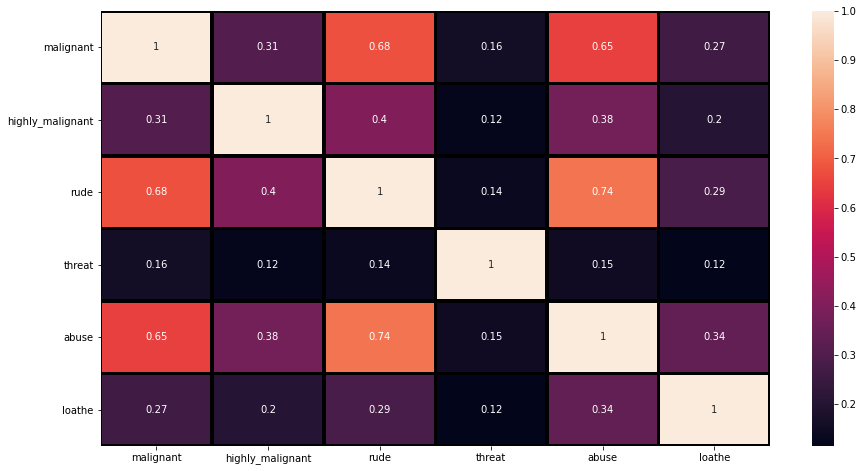

In [11]:
#Visualizing the correlation using heatmap
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(),linewidth=2.5,annot=True,linecolor="black")

Univariate analysis:


Counting of labels for: malignant
0    144277
1     15294
Name: malignant, dtype: int64 



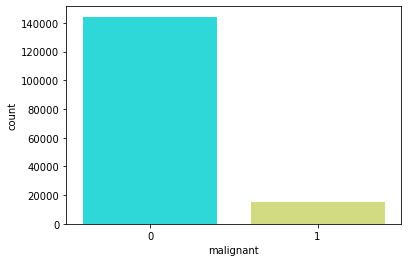

Counting of labels for: highly_malignant
0    157976
1      1595
Name: highly_malignant, dtype: int64 



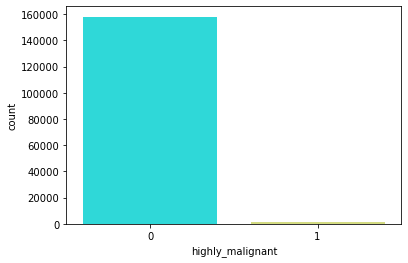

Counting of labels for: loathe
0    158166
1      1405
Name: loathe, dtype: int64 



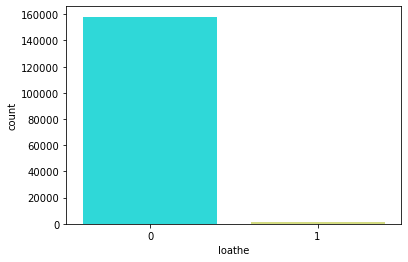

Counting of labels for: rude
0    151122
1      8449
Name: rude, dtype: int64 



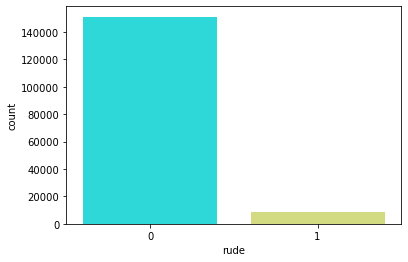

Counting of labels for: abuse
0    151694
1      7877
Name: abuse, dtype: int64 



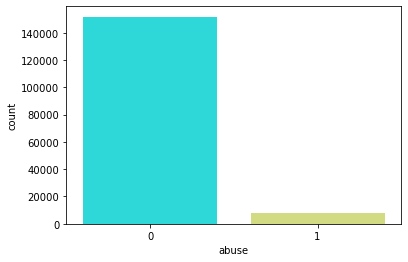

Counting of labels for: threat
0    159093
1       478
Name: threat, dtype: int64 



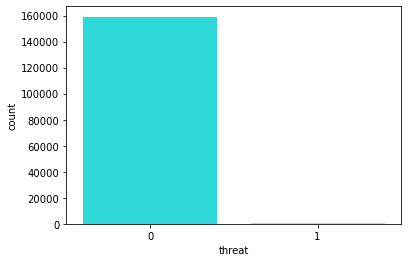

In [12]:
#Checking the count of each column using countplot
col=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col:
    print("Counting of labels for:", i)
    sns.countplot(train[i],palette='rainbow',saturation=0.95)
    print(train[i].value_counts(),'\n')
    plt.show()

Now Lets Create a column Label using some feature engineering and make two values '0','1' .         
"0":If the comment is not malignant.
"1":If the comment is either in any of the columns['malignant','highly_malignant','rude','threat','abuse','loathe']

In [13]:
target_cols = ['malignant','highly_malignant','rude','threat','abuse','loathe']

In [14]:
#checking count of values
train[target_cols].sum()

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

In [15]:
target_label = train[target_cols]
train['label'] = train[target_cols].sum(axis=1)

In [16]:
#Now we can find the new feature label
train.head(20)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,0


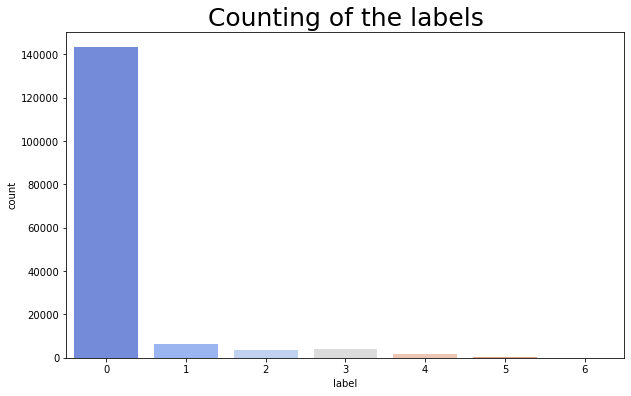

In [17]:
#Checking the count of labels
plt.figure(figsize=(10,6))
sns.countplot(train['label'], palette='coolwarm')
plt.title('Counting of the labels',fontsize=25)
plt.show()

In [18]:
#Now let us scale all the values as 0 and 1 
train['label'] = train['label'] >0
train['label'] = train['label'].astype(int)

In [19]:
#Now let us check the changed count value of label

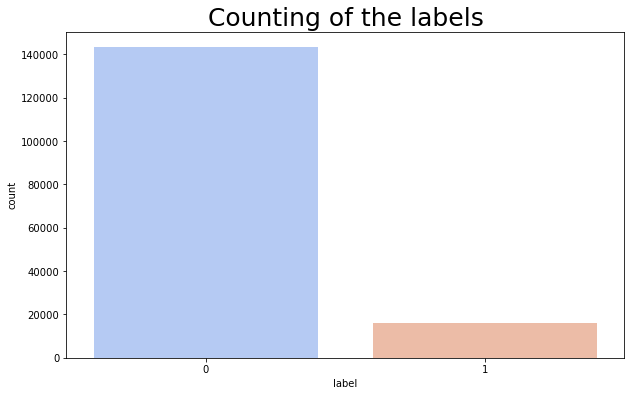

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(train['label'], palette='coolwarm')
plt.title('Counting of the labels',fontsize=25)
plt.show()

In [21]:
train['label'].value_counts()

0    143346
1     16225
Name: label, dtype: int64

Observation: Now we observe that there are made two values '0' for no and '1' for yes in case of malignant comment.

In [22]:
#lets create a length column for the comment length
train['comment_length'] = train['comment_text'].str.len()
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67


Data Cleaning using NLTK:
    -> let us transform the comment text without noise using natural language processing from nltk

In [23]:
import nltk
import string
import re
from nltk.corpus import stopwords

In [24]:
# REmoving html tags from the text
def clean(text):
    cleaned = re.compile(r"<.*?>")
    return re.sub(cleaned," ",text)

train.comment_text = train.comment_text.apply(clean)
train.comment_text[1]

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

In [25]:
#Remoing special characters by using string.punctuation.
def is_special(text):
    empty = ''
    for i in text:
        if i.isalpha():
            empty = empty + i
        else:
            empty = empty + ' '
    return empty

train.comment_text = train.comment_text.apply(is_special)
train.comment_text[1]

'D aww  He matches this background colour I m seemingly stuck with  Thanks    talk         January           UTC '

In [26]:
#Making all text into lower case .

def lower(text):
    return text.lower()

train.comment_text = train.comment_text.apply(lower)
train.comment_text[1]

'd aww  he matches this background colour i m seemingly stuck with  thanks    talk         january           utc '

In [27]:
#Removing stop words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(text):
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure','yo','Ja'])
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

train.comment_text = train.comment_text.apply(remove_stopwords)
train.comment_text[1]

['aww',
 'matches',
 'background',
 'colour',
 'seemingly',
 'stuck',
 'thanks',
 'talk',
 'january',
 'utc']

In [28]:
#Lemmatization:
from nltk.stem import WordNetLemmatizer

def lema_text(text):
    lema = WordNetLemmatizer()
    return " ".join([lema.lemmatize(w) for w in text])

train.comment_text = train.comment_text.apply(lema_text)
train.comment_text[1]

'aww match background colour seemingly stuck thanks talk january utc'

Lets check how much is the length after cleaning with new column:

In [29]:
train['cleaned_text_len'] = train.comment_text.str.len()
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length,cleaned_text_len
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,0,264,156
1,000103f0d9cfb60f,aww match background colour seemingly stuck th...,0,0,0,0,0,0,0,112,67
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,0,233,141
3,0001b41b1c6bb37e,make real suggestion improvement wondered sect...,0,0,0,0,0,0,0,622,364
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0,0,67,29


In [30]:
train['cleaned_text_len'].sum()

38788758

In [31]:
train['comment_length'].sum()

62893130

We can observe that there is a so much data cleaned after the Data cleaning stage

VECTORIZATION: TFIDF VECTORIZER:

In [32]:
#IMPORTING TFIDF VECTORIZER
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 15000, stop_words='english')

In [33]:
x = tf_vec.fit_transform(train['comment_text'])

In [34]:
y = train['label']

In [35]:
#Checking the count of normal comments and malignant comments
train.label.value_counts()

0    143346
1     16225
Name: label, dtype: int64

#let us check the percentage of value counts
train['label'].value_counts(normalize=True) *100

In [36]:
train['label'].value_counts(normalize=True) *100

0    89.832112
1    10.167888
Name: label, dtype: float64

Observation: we can see that the normal comments are 89% and malignant comments arre 11% of the comments. So there is unbalanced data to train the model . We have to use balanced data for to get better accuracy.

Splitting the data into train and test by using train_test_split

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42,stratify=y)

Using Balancing Techniques from imblearn library

In [38]:
from collections import Counter
Counter(y_train)

Counter({0: 107509, 1: 12169})

We can see it is taking more samples from 0 and less from 1 so the data set is very large.

USING OVER SAMPLING METHOD:

In [39]:
#using randomoversampler from imblearn
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [40]:
os = RandomOverSampler(0.75)
x_train_os,y_train_os = os.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

The number of classes before fit Counter({0: 107509, 1: 12169})
The number of classes after fit Counter({0: 107509, 1: 80631})


In [41]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train_os,y_train_os)

DecisionTreeClassifier()

In [42]:
y_pred_train = dtc.predict(x_train)
print('Training accuracy is {}\n'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test=dtc.predict(x_test)
print('Test accuracy is {}\n'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9986463677534718

Test accuracy is 0.9274810117063144

[[34030  1807]
 [ 1086  2970]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     35837
           1       0.62      0.73      0.67      4056

    accuracy                           0.93     39893
   macro avg       0.80      0.84      0.82     39893
weighted avg       0.93      0.93      0.93     39893



In [43]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,y_pred_test)
print("AUC_Score:",auc_score)

AUC_Score: 0.8409128866351311


USING LOGISTIC REGRESSION:

In [46]:
from sklearn.linear_model import LogisticRegression

In [48]:
lg=LogisticRegression()

In [49]:
lg.fit(x_train_os,y_train_os)

LogisticRegression()

In [51]:
y_pred_train1 = lg.predict(x_train)
print('Training accuracy is {}\n'.format(accuracy_score(y_train, y_pred_train1)))
y_pred_test1=lg.predict(x_test)
print('Test accuracy is {}\n'.format(accuracy_score(y_test,y_pred_test1)))
print(confusion_matrix(y_test,y_pred_test1))
print(classification_report(y_test,y_pred_test1))

Training accuracy is 0.9600929159912431

Test accuracy is 0.9454540896899205

[[34319  1518]
 [  658  3398]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     35837
           1       0.69      0.84      0.76      4056

    accuracy                           0.95     39893
   macro avg       0.84      0.90      0.86     39893
weighted avg       0.95      0.95      0.95     39893



In [58]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,y_pred_test1)
print("AUC_Score:",auc_score)

AUC_Score: 0.8977063734059082


We can see that Logistic regression is performing good so let us use that model

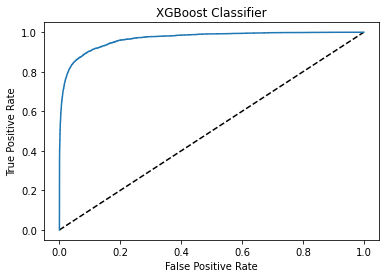

0.8977063734059082


In [60]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thredholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Classifier')
plt.show()

auc_score=roc_auc_score(y_test,lg.predict(x_test))
print(auc_score)

Model Validation on test data set

In [61]:
# 1.Removing HTML tags
test.comment_text = test.comment_text.apply(clean)

#2.Removing Special Characters
test.comment_text = test.comment_text.apply(is_special)

#3.Convert into lower case
test.comment_text = test.comment_text.apply(lower)

#4.Stopwords Removal
test.comment_text = test.comment_text.apply(remove_stopwords)

#5.Lemmatization
test.comment_text = test.comment_text.apply(lema_text)

In [62]:
test_data =tf_vec.fit_transform(test['comment_text'])
test_data

<153164x15000 sparse matrix of type '<class 'numpy.float64'>'
	with 2889641 stored elements in Compressed Sparse Row format>

In [81]:
prediction=lg.predict(test_data)
prediction

array([0, 0, 0, ..., 0, 0, 0])

Saving The model:

In [82]:
import joblib
model = joblib.dump(lg,'Malignant Comment.pkl')
model

['Malignant Comment.pkl']